# DATA20001 Deep Learning - Exercise 2

**Due Tuesday November 14, before 12:00 PM (noon)**

In this first exercise we are going to write our own simple feedforward neural network using just Python and numpy (the standard numeric library for Python). In future exercises we'll use [Keras](https://keras.io/), which is a high-level neural networks library that does a lot of things automatically. Still, it's very useful to at least once do it "by hand" to understand how neural networks really work.

Please read the explanations below carefully, and read the existing code.  <span style="background-color: yellow">Places where you have to fill in your own code (this is the exercise part!) are mentioned in the text with a yellow background like this.</span>

## Exercise 2.1. Single neuron network (2 points)

In this first exercise we're implementing just a simple neuron, or *perceptron*, as visualised below.  We'll have just three inputs and one output neuron, and will skip the bias for now.

![Perceptron](figs/perceptron.png)

Notice how the perceptron is basically just performing a sum of the individual inputs multiplied by the corresponding weights mapped through an activation function $f(\cdot)$.  This can also be expressed as a dot product of the weight vector $\textbf{w}$ and the input vector $\textbf{x}$. Thus: $\hat{y}=f(\textbf{w}^T \textbf{x})$.

We'll start the Python program by importing the libraries we're going to need.

*You need to select and run each field of Python code to run it. You can run it by clicking the "Run" button above or pressing Shift-Enter on the keyboard. If you make changes in the code you can just rerun that part.*

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Training data

Next, we'll define our very simple dataset and the desired target values.  Below, each row is a single example: the first three columns the input and the last column the desired output.

    0 0 1  0  
    0 1 1  0  
    1 0 1  1  
    1 1 1  1  

You might notice that our desired outputs are equal to the first column of the input.  We're not "telling" our network that, however.  Instead we'll see if it can learn that just from the data.

Now let's construct this as the `X` and `y_target` matrices in Python.

In [2]:
# Our input data is a matrix, each row is one input sample
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
# The desired output as a column vector in 2-D array format (.T means transpose)
y = np.array([[0,0,1,1]]).T

print('X=',X)
print('y=',y)

X= [[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
y= [[0]
 [0]
 [1]
 [1]]


### Activation function

Next, we need to define the activation function $f(\cdot)$.

<span style="background-color: yellow">Write the code for the sigmoid function here:</span>

In [3]:
# Define f() as the sigmoid function
def f(x):
    return 1/(1+np.exp(-x)) 

We will use the sigmoid function for the exercise, but let's also plot some other common choices for the activation function. Feel free to experiment with the others as well later in the exercise.

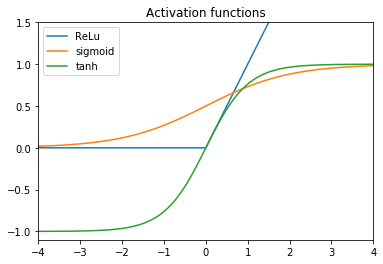

In [4]:
x = np.arange(-4,4,.01)
plt.figure()
plt.plot(x, np.maximum(x,0), label='ReLu')
plt.plot(x, f(x), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.axis([-4, 4, -1.1, 1.5])
plt.title('Activation functions')
l = plt.legend()

# Delete temporary variables, so not to cause any confusion later :-)
del x, l

### Initialise weights

We'll initialise our weights randomly, so that their mean is zero (it's good to not have them biased in any direction).

In [5]:
np.random.seed(42)

# initialize weights randomly with mean 0
w = 2*np.random.random((3,1)) - 1

print('w=', w)

w= [[-0.25091976]
 [ 0.90142861]
 [ 0.46398788]]


### Forward propagation

Now let's try one round of forward propagation.  This means taking an input sample and moving it forward through the network, finally calculating the output of the network.

Remember that for our single neuron this is simply $\hat{y} = f(\mathbf{w}^T \mathbf{x})$, where $\mathbf{x}$ is one input vector.

In our program we've put all input vectors as rows of the matrix `X`, we can access the first row by `X[0]`. Let's store it in the variable `X0` for easier access. We'll use `reshape` to make sure it's expressed as a column vector.

In [6]:
X0=np.reshape(X[0], (3,1))
print(X0)

[[0]
 [0]
 [1]]


The output for the first input can then be calculated according to the formula given above. For the multiplication we use [numpy's `dot` function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) as it performs matrix multiplication when given 2-D arrays.

In [7]:
y_out = f(np.dot(w.T, X0))

print('y_out=', y_out)

y_out= [[ 0.61395979]]


Our desired result is stored in `y[0]`.  If you check back, you can see we defined it to be 0. You can see that our network is pretty far away from the right answer. This is why we need to backpropagate, to adjust the weights in the right direction.

### Backpropagation

The next step is to update the weights by propagating the error backwards in the network.  Exactly how this is done depends on the activation function, or more specifically its derivative. (The ReLU and sigmoid cases were shown in the first week's lectures!)

Recall that the weight update is given as $\Delta w_{ji} = -\epsilon \delta_j h_i$. Here, our network has only one layer, so $h_i$ is just the input, i.e., $h_i=x_i$, and a single output neuron so there is no need for index $j$. 

In matrix form we can calculate this in one go for all the weights:

$$\Delta \textbf{w} = -\epsilon \delta \textbf{x}_0$$

where $\textbf{x}_0$ is our first input sample in variable `X0`.

Below you can find the same formula in Python code, except that <span style="background-color: yellow">you need to fill in the Python code to calculate the gradient term $\delta$.</span>

Recall that $y$ is the desired output, i.e. `y[0]` in the Python code, and $\hat{y}$ is `y_out` here.

In [8]:
# epsilon determines the step size in the gradient descent, you can experiment with different values if you want
eps = 0.5 

# Fill in the code for the gradient term
grad = (y_out-y[0])*y_out*(1-y_out)

# Calculate the weight update
w_delta = -eps * grad * X0

print(w_delta)

# Update the weight
w += w_delta

[[-0.        ]
 [-0.        ]
 [-0.07275828]]


Now let's try a forward propagation again with the same input.

In [9]:
y_out=f(np.dot(w.T, X0))

print('y_out=', y_out)

y_out= [[ 0.59657867]]


You should notice that the result has moved (very slightly) towards the correct answer (that is zero).

Now what is needed is more iterations!  But first, we'll discuss batch training...


### Batch training

With real-world data it is very slow to handle each example one-by-one like we did above.  Instead one typically uses so called mini batches of several input examples at once.  We'll demonstrate it here just by using the full input matrix `X` at once in one big batch.

As each input example is one row in $\textbf{X}$, instead of a single column vector as before, the forward propagation step looks a bit different mathematically: $\hat{\textbf{y}} = f(\textbf{X}\textbf{w})$.

In [10]:
y_out = f(np.dot(X, w))
print(y_out)

[[ 0.59657867]
 [ 0.78459678]
 [ 0.53502003]
 [ 0.7391853 ]]


Then we'll get the corresponding output (each value in `y_out`) for each input (each row in `X`) in a single matrix multiplication.  The error and weight updates can similarly all be calculated in a single go using matrix multiplications similar to the steps we did a above with single vectors.

In this exercise we'll stick to just doing one sample at a time, as the batch mode makes it a bit more complicated to understand.  Of course, if you want you can implement everything here in batch mode as well as an additional exercise :-)

### Training iterations

Let's finally do some real training of our network. Remember that each time we'll first calculate the outputs with our given input (forward propagation), then we'll check how much the output differ from the desired output and propagate the error back (backward propagation).  We'll do this for each sample data point, and then iterate this over and over again using a for loop.

Below is most of the code needed, <span style="background-color: yellow">you just need to fill in how to calculate the gradient $\delta$</span>.

In [11]:
# For training we need to iterate over the training set several times
# You can adjust how many times by changing the value of N
num_iters = 1000

eps = 0.5

# We'll also calculate the mean square error (MSE) in every round so we can see how it develops,
# mse is just an array to store these for each round
mse = np.zeros(num_iters)

# For-loop for the iterations
for it in range(num_iters):
    
    # For-loop going over each sample in X
    for n in range(len(X)):
        # Extract the n:th sample and the corresponding desired output
        x_n = np.reshape(X[n], (3,1))
        y_n = y[n]
        
        # Forward propagation
        y_out = f(np.dot(w.T, x_n))

        # Let's keep track of the sum of squared errors
        mse[it] += np.square(y_out - y_n)
    
        # Fill in the code for the gradient term
        grad = (y_out-y_n)*y_out*(1-y_out)
    
        # Calculate the weight update
        w_delta = -eps * grad * x_n

        # Update the weights
        w += w_delta

    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

y_out = f(np.dot(X, w))
print("Output after training, y_out")
print(y_out)
print("Desired output, y")
print(y)

Output after training, y_out
[[ 0.04624148]
 [ 0.03734403]
 [ 0.96980397]
 [ 0.96254331]]
Desired output, y
[[0]
 [0]
 [1]
 [1]]


Here you should see that the output of the network after training is pretty close to the desired output, i.e., the two first ones are close to zero, and the two last ones close to one.

Finally, let's plot the mean squared error over time (iterations of the training).

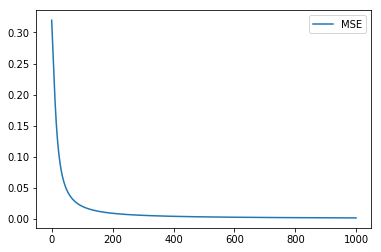

In [12]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
l = plt.legend()

You should see the error going down pretty quickly in the beginning and then slowing down.

## Exercise 2.2. Two layer network (2 points)


Now let's try a slightly more difficult example. We'll use the same input data, but a different desired output.

**Note:** if you haven't just done Exercise 2.1, you'll need to go back to the first Python box and run the import statements again to get numpy loaded.

In [13]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
    
y = np.array([[0,1,1,0]]).T

We'll reset the weights. <span style="background-color: yellow">You also need to define the function `f()` again or reuse it from Exercise 2.1.</span>

In [14]:
# Let's reset the weights first
w = 2*np.random.random((3,1)) - 1

# We'll use sigmoid again so you can call f() from above
def f(x):
    return 1/(1+np.exp(-x)) 

Below is a copy of the single neuron network we created in the previous exercise minus the <span style="background-color: yellow">gradient calculation that you have to fill in yourself</span>.  You copy your gradient formula from the previous exercise and try with the new data.

In [15]:
num_iters = 1000
eps = 0.5

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_n = y[n]
        
        # Forward propagation
        y_out = f(np.dot(w.T, x_n))

        # Fill in the code for the gradient term
        grad = (y_out-y_n)*y_out*(1-y_out)
    
        # Calculate the weight update
        w_delta = -eps * grad * x_n

        # Update the weights
        w += w_delta

# Now let's see the output for each input sample with the trained weights
# Using batch mode we can do this in a single line
y_out = f(np.dot(X, w))
print("Output after training, y_out")
print(y_out)
print("Desired output, y")
print(y)

Output after training, y_out
[[ 0.516106  ]
 [ 0.5       ]
 [ 0.483894  ]
 [ 0.46782138]]
Desired output, y
[[0]
 [1]
 [1]
 [0]]


As you can see the network is not able to solve the problem, it's not even close. You can try to increase the number of iterations, but it won't help. This is in fact just the XOR problem as discussed in the lectures (you'll notice that the last column of the input data is just ones, and thus irrelevant). You'll need a two layer network to solve it.

Let's add a single hidden layer, for example with 4 hidden nodes (you can experiment with this number if you like).

![Two layer network](figs/two_layer.png)

The input to the network is $\mathbf{x}$ as before.  The first hidden layer calculates $\textbf{h} = f(\textbf{U}^Tx)$, note that $\textbf{U}$ is now a $3 \times 4$ matrix.  The output layer calculates $\hat{y} = f(\textbf{w}^T\textbf{h})$.

We'll start by initialising the weights randomly again.

In [16]:
np.random.seed(42)

num_hidden = 4

# initialize weights randomly with mean 0
u = 2*np.random.random((3,num_hidden)) - 1
w = 2*np.random.random((num_hidden,1)) - 1


Next you'll need to <span style="background-color: yellow">fill in the missing parts for both the forward and backward propagation</span>.  Below we have provided a skeleton for doing the iterations.

In [17]:
num_iters = 2000
eps = 0.5

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_n = y[n]

        # Calculate h
        h = f(np.dot(u.T,x_n))
        # Calculate y_out
        y_out = f(np.dot(w.T,h))
        # Calculate the gradient
        grad = (y_out-y_n)*y_out*(1-y_out)
        w_delta = -eps * grad * h

        # Calculate the weight updates for u
        # hint: you can do this with matrices, but it might easier to understand if you 
        # perform a for loop over i (hidden nodes) and k (input nodes) and calculate 
        # each u_ik update separately
        grad_2 = grad*w*h*(1-h)

        u += -eps*grad_2.T*x_n
                
        # Update the weights, note: it's important the w weights are updated at the end,
        # the above calculation should be done with the old weights
        w += w_delta
    
y_out = f(np.dot(f(np.dot(X, u)), w))
print("Output after training, y_out")
print(y_out)
print("Desired output, y")
print(y)

Output after training, y_out
[[ 0.03654678]
 [ 0.94784955]
 [ 0.95442043]
 [ 0.05238147]]
Desired output, y
[[0]
 [1]
 [1]
 [0]]


You should see outputs very similar to the desired ones if you have succeeded.

## Exercise 2.3. Two-layer network with Keras (2 points)

Finally, let's make the same network as in the previous exercise but using the Keras library.

Below is all the setup and training code, you just need to <span style="background-color: yellow">add the code that creates the two feed-forward layers (called fully connected or dense layers).</span> Remember to also include the sigmoid activation. You can find the [documentation of Keras online](https://keras.io/getting-started/sequential-model-guide/), in particular you might want to see the [documentation on Keras layers](https://keras.io/layers/core/).

In [18]:
# Import the needed Keras libraries
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

# Dataset, same as before
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

y = np.array([[0,1,1,0]]).T

# Same parameters as before
num_hidden = 4
batch_size = 1
num_iters = 2000

# Setting up the neural network by adding each layer in sequence
model = Sequential()

# First, add the hidden layer including sigmoid activation here
model.add(Dense(3, input_shape=(X.shape[1],),activation='sigmoid'))
# Second, the output layer, also with a sigmoid
model.add(Dense(1,activation='sigmoid'))
# Here we use stochastic gradient descent with epsilon (i.e. the learning rate) = 1.0
sgd = optimizers.SGD(lr=0.5)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Finally, this line runs the actual training
model.fit(X, y, epochs=num_iters, batch_size=1, verbose=0)

# Check the output with the trained weights
y_out = model.predict(X, batch_size=1)
print(y_out)

Using TensorFlow backend.


[[ 0.02696089]
 [ 0.97232789]
 [ 0.96642083]
 [ 0.02879277]]


You might not get exactly the same result as with our own network as the weights were initialised differently, and Keras only supports more advanced optimizers. (So the gradient descent isn't done exactly in the same way.)

You probably noticed that Keras did a lot of things automatically that we had to do ourselves in the numpy examples above. <span style="background-color: yellow">In particular, what things did Keras do automatically "behind the scenes" just for the few lines that you added yourself to create the network layers? Please write 2-3 sentences in the field below.</span>

In keras, weights are automatically initialized at beginning. During trainning iteration, backpropagation is applied and all calculation for updating weights is done automatically. 